# COVID-Team-1
## Dr. Mohanty
## Katelynn Urgitus
## CSC 405-01
## Last Updated: 09/21/2020
## I, Katelynn Urgitus, have abided by the UNCG Academic Integrity Policy.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
In this notebook we will be looking at the $\color{green}{\text{COVID-19 Data}}$ for the whole USA

Then merge the $\color{green}{\text{COVID-19 Data}}$ with the $\color{blue}{\text{Hospital}}$ Enrichment set

And finally take a look at $\color{green}{\text{COVID-19 Data}}$ trends for the last week in $\color{purple}{\text{Pennsylvania}}$
### -------------------------------------------------------------------------------------------------------------------------------------------------------------

Changing the directory to gain access to our $\color{green}{\text{COVID-19 Data}}$ files

In [1]:
cd ..

C:\Users\katel\Desktop\UNCG\Fall_2020\CSC405\FinalProject\COVID-Team-1\src


Adding imports for our $\color{green}{\text{COVID-19 Data}}$ notebook and to be able to display the data

In [2]:
import ipynb
from ipynb.fs.full.covid_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Setting our Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

First we need to make sure we have an up to date *covid_primary_data.csv* using our update function

Then we can check it using our get method

Lets calculate the trend for the last week of data

In [3]:
df = pd.read_csv("../data/Covid/covid_primary_data.csv")
df.head()

   countyFIPS     County Name State  stateFIPS  cases - 1/22/20  \
0        1001  Autauga County    AL          1                0   
1        1003  Baldwin County    AL          1                0   
2        1005  Barbour County    AL          1                0   
3        1007     Bibb County    AL          1                0   
4        1009   Blount County    AL          1                0   

   cases - 1/23/20  cases - 1/24/20  cases - 1/25/20  cases - 1/26/20  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   cases - 1/27/20  ...  deaths - 9/8/20  deaths - 9/9/20  deaths - 9/10/20  \
0                0  ...               24               24                24   


In [15]:
# Grouping and creating our last week column list
covid_grouped = df.groupby(df.State)
last_week_cases = ['cases - 9/10/20','cases - 9/11/20', 
             'cases - 9/12/20', 'cases - 9/13/20',
             'cases - 9/14/20', 'cases - 9/15/20', 
             'cases - 9/16/20']
last_week_deaths = ['deaths - 9/10/20','deaths - 9/11/20', 
             'deaths - 9/12/20', 'deaths - 9/13/20',
             'deaths - 9/14/20', 'deaths - 9/15/20', 
             'deaths - 9/16/20']

Instead of looking at every county, we will only look at the top 5 counties for each state

In [16]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

In [17]:
top5Counties = covid_grouped.apply(top, column=last_week_cases, n=5)[['County Name', 'cases - 9/10/20','cases - 9/11/20', 
             'cases - 9/12/20', 'cases - 9/13/20',
             'cases - 9/14/20', 'cases - 9/15/20', 
             'cases - 9/16/20' ]]
top5Counties.head(10)

                           County Name  cases - 9/10/20  cases - 9/11/20  \
State                                                                      
AK    69     Municipality of Anchorage             3411             3450   
      74  Fairbanks North Star Borough              804              836   
      83     Matanuska-Susitna Borough              520              529   
      78       Kenai Peninsula Borough              425              426   
      77    City and Borough of Juneau              218              223   
AL    36              Jefferson County            17736            17908   
      48                 Mobile County            12711            12749   
      50             Montgomery County             8310             8349   
      44                Madison County             6965             7057   
      62             Tuscaloosa County             6525             6590   

          cases - 9/12/20  cases - 9/13/20  cases - 9/14/20  cases - 9/15/20  \
State  

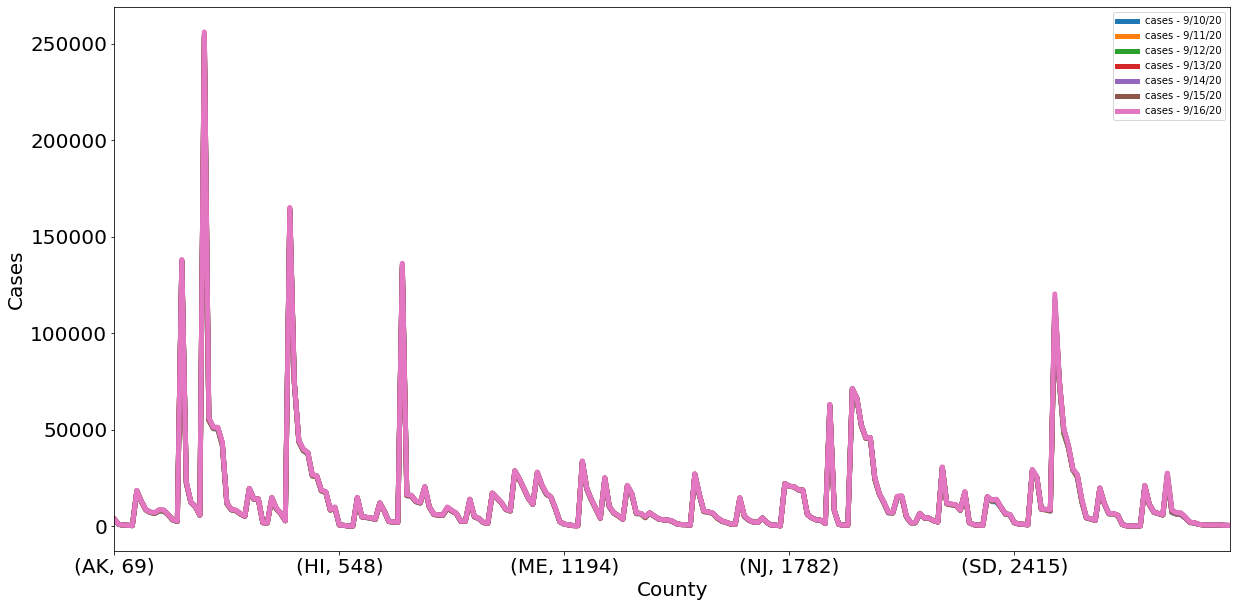

In [18]:
top5Counties[last_week].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xlabel('County', fontsize=20);

Overall, we can see $\color{red}{\text{very little}}$ change between dates for the last week 

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's begin to merge our $\color{green}{\text{COVID-19 Data}}$ and $\color{blue}{\text{Hospital}}$

Now we can display our $\color{blue}{\text{Hospital}}$

In [19]:
get_county_hospital().head()

            X          Y  OBJECTID  \
0 -112.066157  33.495498         1   
1 -110.965885  32.181263         2   
2 -119.779742  36.773323         3   
3  -72.957610  41.284400         4   
4  -75.606533  39.740206         5   

                                       HOSPITAL_NAME HOSPITAL_TYPE  \
0  Phoenix VA Health Care System (AKA Carl T Hayd...   VA Hospital   
1             Southern Arizona VA Health Care System   VA Hospital   
2           VA Central California Health Care System   VA Hospital   
3  VA Connecticut Healthcare System - West Haven ...   VA Hospital   
4                       Wilmington VA Medical Center   VA Hospital   

               HQ_ADDRESS HQ_ADDRESS1     HQ_CITY HQ_STATE  HQ_ZIP_CODE  ...  \
0  650 E Indian School Rd         NaN     Phoenix       AZ        85012  ...   
1          3601 S 6th Ave         NaN      Tucson       AZ        85723  ...   
2      2615 E Clinton Ave         NaN      Fresno       CA        93703  ...   
3        950 Campbell Ave     

Finally we merge our $\color{blue}{\text{Hospital}}$ with our $\color{green}{\text{COVID-19 Data}}$ using an outer merge to ensure that we include the multiple entries per county

In [20]:
hospital_merged_covid = pd.merge(get_covid_primary_data(), \
                                get_county_hospital(), \
                                how = 'outer')
hospital_merged_covid.to_csv("../data/Hospitals/hospital_merged_covid.csv", index=False)

Now we should be able to see the combined data table

In [21]:
hospitals_cvd = pd.read_csv("../data/Hospitals/hospital_merged_covid.csv")
hospitals_cvd.head()

   countyFIPS     County Name State  stateFIPS  cases - 1/22/20  \
0      1001.0  Autauga County    AL        1.0              0.0   
1      1003.0  Baldwin County    AL        1.0              0.0   
2      1003.0  Baldwin County    AL        1.0              0.0   
3      1003.0  Baldwin County    AL        1.0              0.0   
4      1003.0  Baldwin County    AL        1.0              0.0   

   cases - 1/23/20  cases - 1/24/20  cases - 1/25/20  cases - 1/26/20  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   cases - 1/27/20  ...  STATE_FIPS  CNTY_FIPS  NUM_LICENSED_BEDS  \
0              0.0  ...         1.0        1.0               85.0   
1              0.0  

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's take a look at $\color{purple}{\text{Pennsylvania}}$

In [22]:
pennsylvania_cvd = hospitals_cvd[hospitals_cvd["State"] == "PA"]

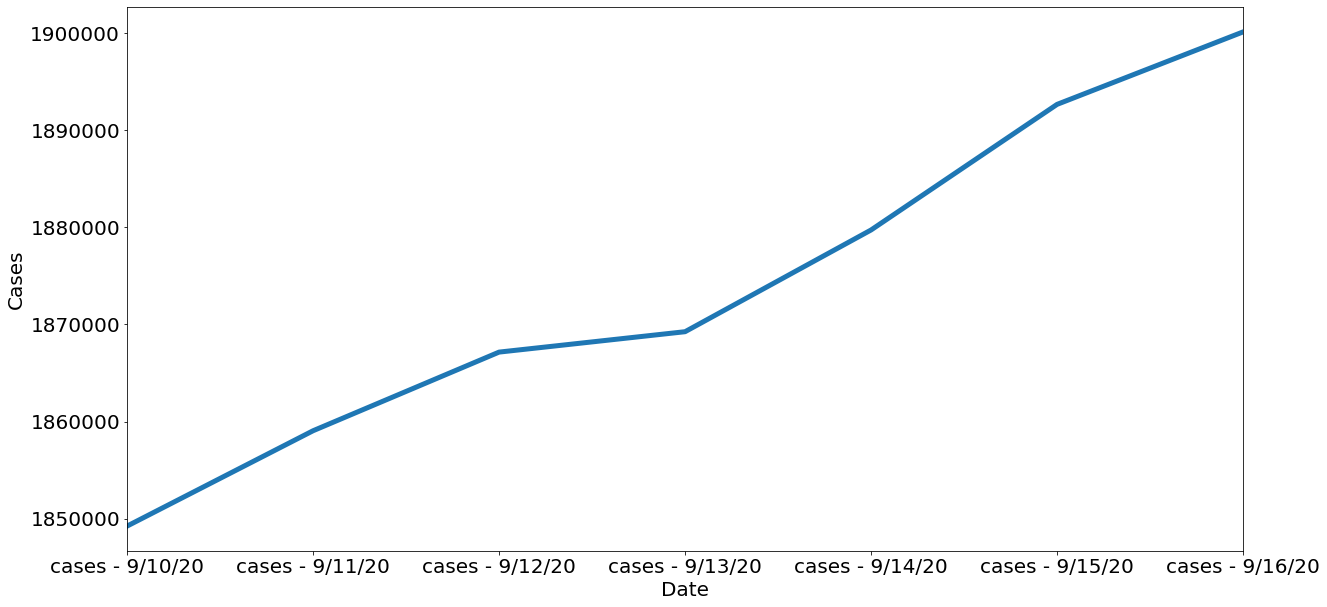

In [24]:
pennsylvania_cvd[last_week_cases].sum().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.xlabel('Date', fontsize=20);

We can see that over this week of data, $\color{purple}{\text{Pennsylvania}}$ has $\color{green}{\text{increased}}$ by almost $\color{red}{\text{500,000}}$ in the number of cases

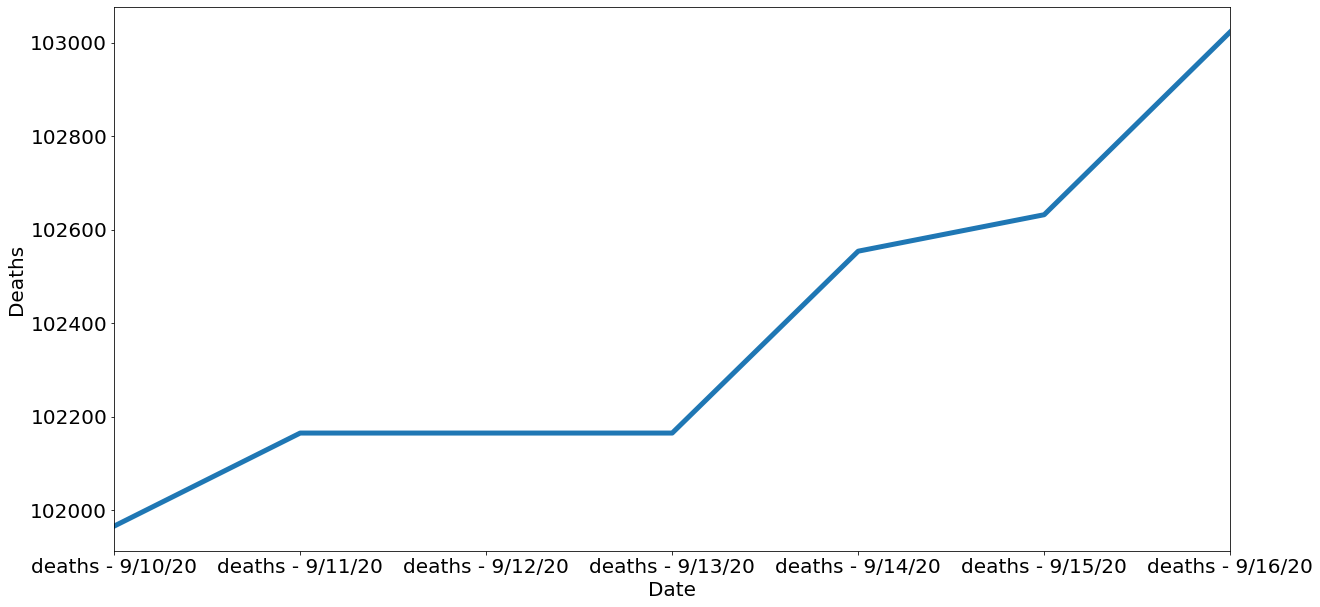

In [25]:
pennsylvania_cvd[last_week_deaths].sum().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Deaths', fontsize=20)
plt.xlabel('Date', fontsize=20);

We can see that over this week of data, $\color{purple}{\text{Pennsylvania}}$ has $\color{green}{\text{increased}}$ by almost $\color{red}{\text{1,000}}$ in the number of deaths. We can see no increase in deaths from 9/11/20 to 9/13/20, then an $\color{green}{\text{increase}}$ of almost $\color{red}{\text{400}}$. This could be due to a hault in data entry for those few days, meaning that no data was updated in that time. 

Much like the overall $\color{green}{\text{COVID-19 Data}}$, $\color{purple}{\text{Pennsylvania}}$ shows little difference across the week 

The cases are  $\color{red}{\text{increasing}}$ steadily over time